In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [174]:
df_init = pd.read_csv("data/data_cleaned_ph2.csv")
df_ref = pd.read_csv("data/lof/data-lof-2024-04-15.csv")

In [175]:
df = pd.read_csv("data/knn/data-knn-2024-04-22.csv")

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109422 entries, 0 to 109421
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        109422 non-null  int64  
 1   id_mls                    109422 non-null  object 
 2   bathrooms_total           109422 non-null  float64
 3   bedrooms_extra            109422 non-null  float64
 4   bedrooms                  109422 non-null  float64
 5   stories_total             109422 non-null  float64
 6   size_interior             109422 non-null  float64
 7   building_type             109422 non-null  object 
 8   agency_name               109422 non-null  object 
 9   agency_type               109422 non-null  object 
 10  property_type             109422 non-null  object 
 11  lng                       109422 non-null  float64
 12  lat                       109422 non-null  float64
 13  ownership_type            109422 non-null  o

In [177]:
df["province"].value_counts()

province
Ontario                    50151
British Columbia           24222
Alberta                    15236
Quebec                      7891
Saskatchewan                4420
Manitoba                    3282
Nova Scotia                 1890
New Brunswick               1390
Prince Edward Island         398
Newfoundland & Labrador      386
Yukon                        100
Northwest Territories         56
Name: count, dtype: int64

In [178]:
df["province"].value_counts()

province
Ontario                    50151
British Columbia           24222
Alberta                    15236
Quebec                      7891
Saskatchewan                4420
Manitoba                    3282
Nova Scotia                 1890
New Brunswick               1390
Prince Edward Island         398
Newfoundland & Labrador      386
Yukon                        100
Northwest Territories         56
Name: count, dtype: int64

In [179]:
# df = df.drop(["id", "id_mls", "agency_name", "agency_type", "property_type", "ownership_type", "land_size", "page_url", "timestamp", "postal_code"], axis=1)
# df.info()

In [180]:
np.round(df[df["province"]=="Ontario"]["price"].describe())

count       50151.0
mean       930097.0
std        541373.0
min        159900.0
25%        599900.0
50%        799000.0
75%       1099000.0
max      10995000.0
Name: price, dtype: float64

## Removing Interior Size Outliers from top

<Axes: title={'center': 'size_interior'}, xlabel='province'>

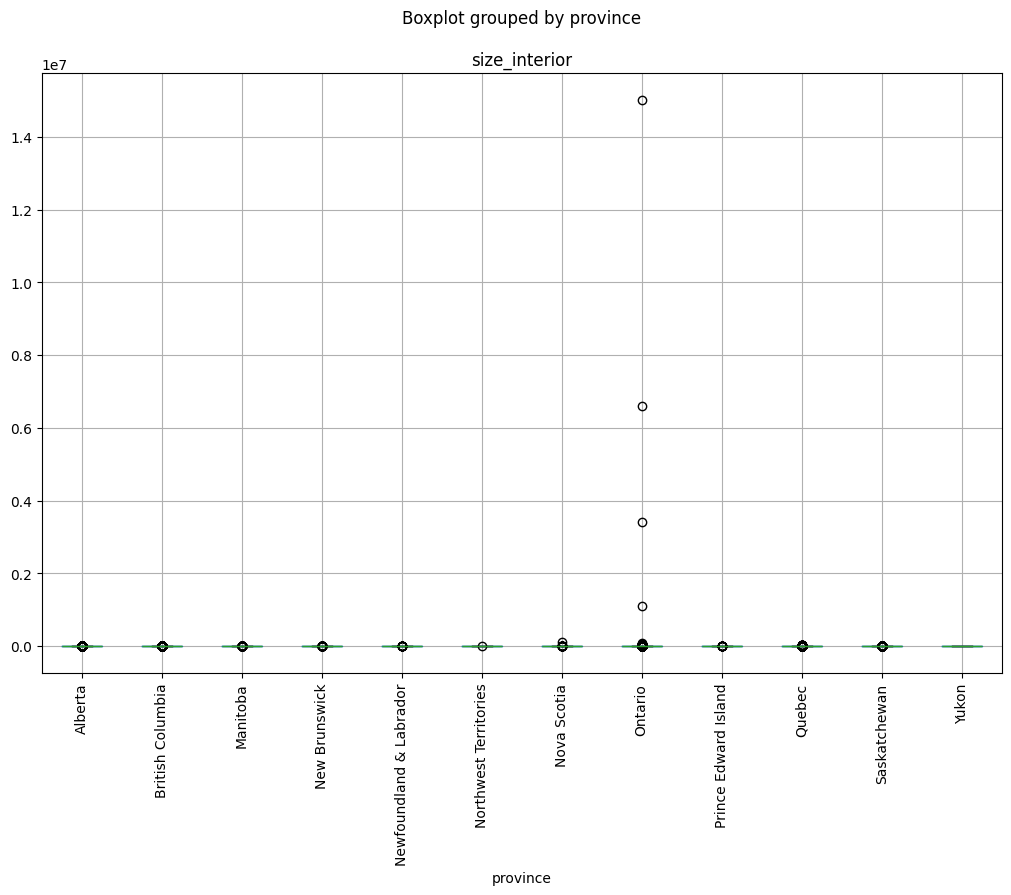

In [181]:
df.boxplot(column="size_interior", by="province", figsize=(12,8), rot=90)

In [182]:
q0 = 0
q25 = df_init["size_interior"].quantile(0.25)
q75 = df_init["size_interior"].quantile(0.75)
iqr = q75 - q25

df = df[(df["size_interior"]>=abs(q25-q0)*0.33) & (df["size_interior"] < (q75+1.5*iqr))]

abs(q25-q0)*0.33

335.94

<Axes: title={'center': 'size_interior'}, xlabel='province'>

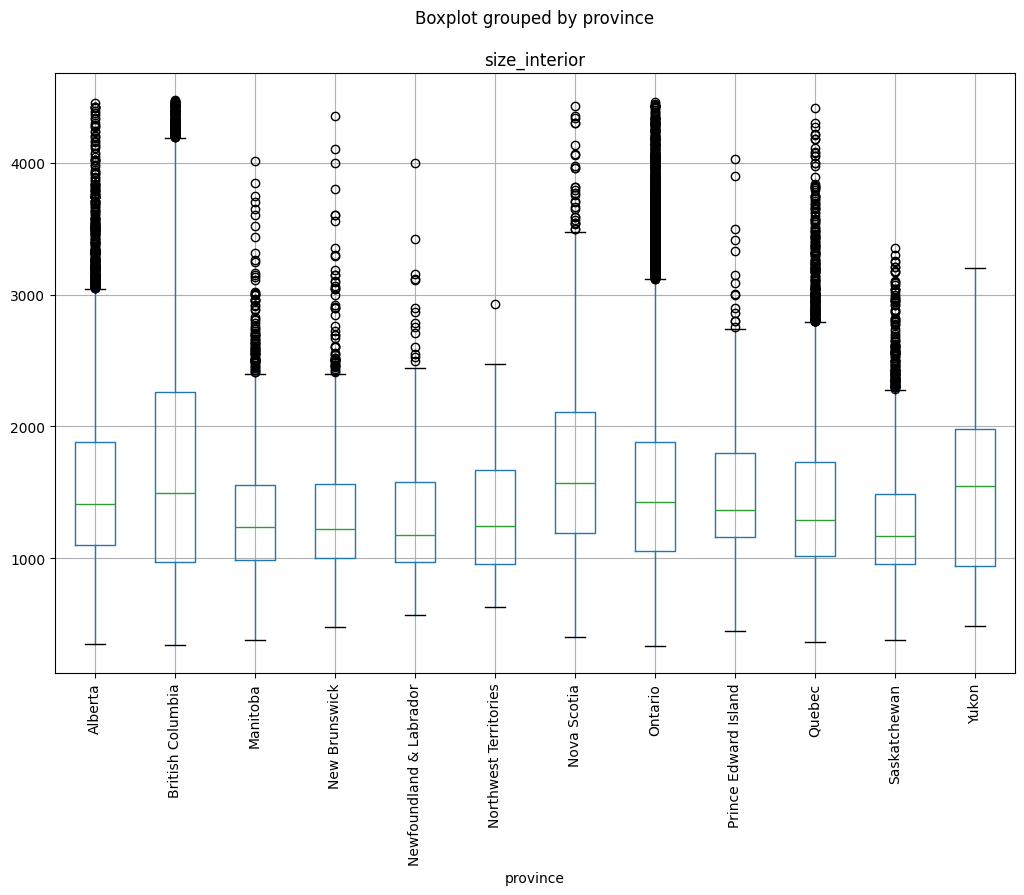

In [183]:
df.boxplot(column="size_interior", by="province", figsize=(12,8), rot=90)

<Axes: title={'center': 'price'}, xlabel='province'>

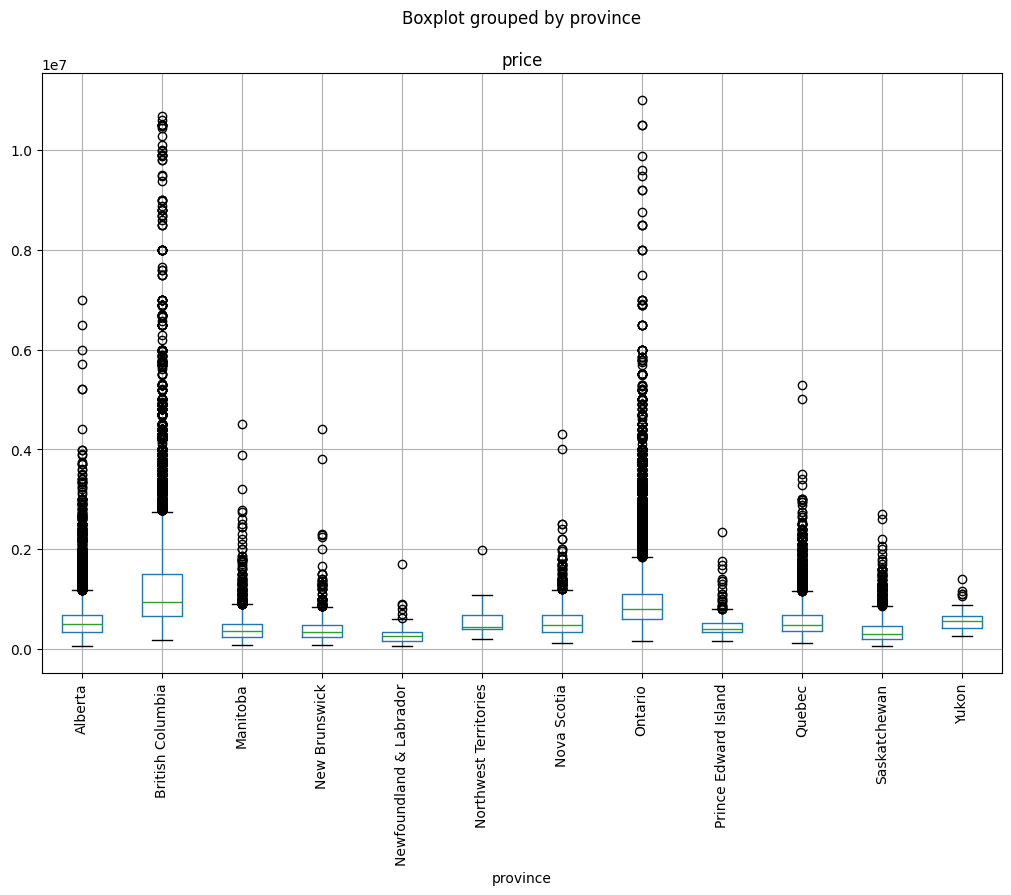

In [184]:
df.boxplot(column="price", by="province", figsize=(12,8), rot=90)

In [185]:
df["province"].value_counts()

province
Ontario                    49901
British Columbia           24179
Alberta                    15234
Quebec                      7852
Saskatchewan                4420
Manitoba                    3282
Nova Scotia                 1887
New Brunswick               1389
Prince Edward Island         398
Newfoundland & Labrador      385
Yukon                        100
Northwest Territories         56
Name: count, dtype: int64

In [186]:
np.round(df[df["province"]=="Ontario"]["price"].describe())

count       49901.0
mean       930148.0
std        540741.0
min        159900.0
25%        599900.0
50%        799888.0
75%       1099000.0
max      10995000.0
Name: price, dtype: float64

# Anomaly Reduction

In [187]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

In [188]:
# Detect anomalies on the new dataset based on the previous dataset
lof = LocalOutlierFactor(n_neighbors=10, novelty=True)
scaler = StandardScaler()

df_ref_scaled = scaler.fit_transform(df_ref[["price", "size_interior", "bathrooms_total", "bedrooms", "bedrooms_extra", "stories_total", "parkings"]])
df_scaled = scaler.transform(df[["price", "size_interior", "bathrooms_total", "bedrooms", "bedrooms_extra", "stories_total", "parkings"]])
# lof_labels = lof.fit_predict(df_scaled)
# df = df[lof_labels==1]

# lof_labels = lof.fit_predict(df[["price", "size_interior", "bathrooms_total", "bedrooms", "bedrooms_extra", "stories_total", "parkings"]])
# df = df[lof_labels==1]

lof.fit(df_ref_scaled)

lof_labels = lof.predict(df_scaled)

df = df[lof_labels==1]

<Axes: title={'center': 'size_interior'}, xlabel='province'>

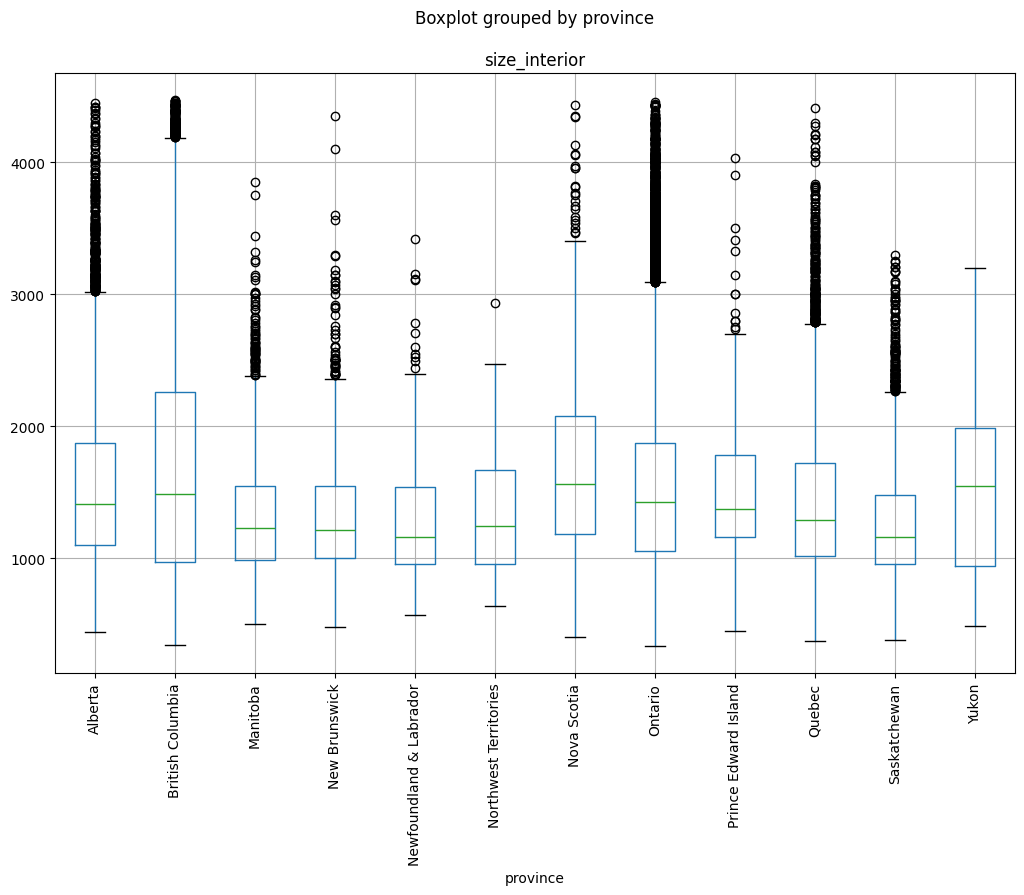

In [189]:
df.boxplot(column="size_interior", by="province", figsize=(12,8), rot=90)

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105783 entries, 0 to 109421
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        105783 non-null  int64  
 1   id_mls                    105783 non-null  object 
 2   bathrooms_total           105783 non-null  float64
 3   bedrooms_extra            105783 non-null  float64
 4   bedrooms                  105783 non-null  float64
 5   stories_total             105783 non-null  float64
 6   size_interior             105783 non-null  float64
 7   building_type             105783 non-null  object 
 8   agency_name               105783 non-null  object 
 9   agency_type               105783 non-null  object 
 10  property_type             105783 non-null  object 
 11  lng                       105783 non-null  float64
 12  lat                       105783 non-null  float64
 13  ownership_type            105783 non-null  object

In [191]:
df["province"].value_counts()

province
Ontario                    48140
British Columbia           23816
Alberta                    14576
Quebec                      7629
Saskatchewan                4319
Manitoba                    3197
Nova Scotia                 1816
New Brunswick               1366
Prince Edward Island         395
Newfoundland & Labrador      373
Yukon                        100
Northwest Territories         56
Name: count, dtype: int64

In [192]:
np.round(df[df["province"]=="Ontario"]["price"].describe())

count       48140.0
mean       925885.0
std        537119.0
min        159900.0
25%        599900.0
50%        799000.0
75%       1099000.0
max      10995000.0
Name: price, dtype: float64

In [193]:
df.to_csv("data/lof/data-lof-2024-04-22.csv", index=False)